In [181]:
## Exercicio de LAB 06 Curso Banco de Dados - FATEC SJC

## Importando biblioteca Pandas
import pandas as pd

# Define o tipo para a coluna diagnosis
DTYPES = {'App': str}

## Importando arquivo salvo no github para analise
url = 'https://github.com/MaXximiles/LAB06/raw/main/Data/water_potability.csv'

## Lendo os dados separados por virgula
wbc= pd.read_csv(url, sep=',', header=0, dtype = DTYPES)

## Exibindo primeiros 5 registros
wbc.head(25)

## Vendo informações da base de dados
wbc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [182]:
## Limpando Dados nulos
wbc.dropna(inplace=True)

## Exibindo primeiros 25 registros
wbc.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [183]:
## Variavel Alvo e Dados
y = wbc['Potability']
x = wbc.drop(['Potability'], axis = 1) ## Armazenando tabela sem coluna Potability

x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [184]:
## Importando bilioteca para corte de dados e teste
from sklearn.model_selection import train_test_split

## Sintaxe train_test_split(Dados(planilha), coluna(alvo) test_size = porcentagem de dados para o teste)
## Divide em x teste e treino e y teste e treino
xTreino, xTeste, yTreino, yTeste = train_test_split(x,y,test_size = 0.7)

In [185]:
## Treinando os Dados: DecisionTreeClassifier(Arvore de Decisão)
from sklearn.tree import DecisionTreeClassifier

## Criação da arvore: 
modelo = DecisionTreeClassifier(max_depth=4, random_state=20)

## Treino da arvore
modelo.fit(xTreino, yTreino)

## Mostrando resultado do treino
resultado = modelo.score(xTeste, yTeste)
print("Acuracia: ", resultado)

Acuracia:  0.6015625


In [186]:
yTeste[100:110]

1691    0
1289    0
1129    1
3257    1
1216    1
443     0
594     0
2156    0
2637    0
2335    1
Name: Potability, dtype: int64

In [187]:
xTeste[100:110]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1691,7.731315,169.049684,38356.226496,6.028454,297.329355,525.879408,16.071120,74.909705,5.164284
1289,5.019985,156.970822,19272.704481,6.184710,331.559845,341.357160,16.196573,75.302598,4.089485
1129,4.872561,224.705105,16960.434631,7.078015,323.036852,354.390604,15.692176,79.962803,3.918006
3257,6.683368,272.111698,18989.316768,5.336202,336.555100,307.725009,20.178716,75.402260,5.208061
1216,6.635894,194.049780,20339.016870,6.032864,307.954902,412.582989,15.894674,57.643457,4.523237
443,7.858663,210.954754,26703.853473,6.509065,341.341899,374.072845,8.811986,72.799798,3.422471
594,5.284097,185.705492,26532.737255,6.132546,328.139582,543.181748,17.398465,47.066392,4.800963
2156,5.423318,185.903179,18020.842428,6.401046,447.417962,332.050056,7.715740,67.333687,5.224655
2637,8.654793,218.172660,14799.311464,6.164049,366.147992,416.870333,8.954520,72.620280,5.148138
2335,4.761105,150.074533,19197.105515,7.936652,374.477319,400.451268,11.132150,69.260350,4.581395


In [188]:
previsao = modelo.predict(xTeste[100:110])
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

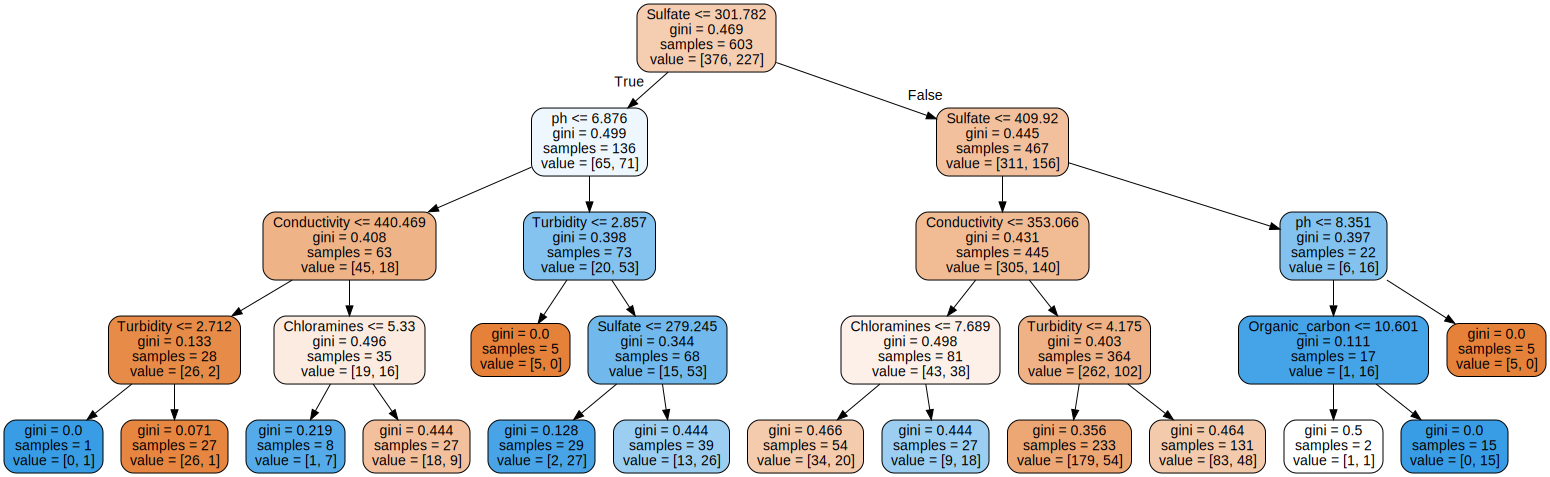

In [189]:
#Visualização gráfica da árvore de decisão
import os
from graphviz import Source
from sklearn.tree import export_graphviz

headers = ['ph',	'Hardness', 'Solids',	'Chloramines',	'Sulfate',	'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']

export_graphviz(modelo,
                out_file='AguaparaConsumo', #Arquivo para armazenamento do modelo gráfico
                feature_names=headers[0:9], #Nomes dos atributos
                rounded=True,
                filled=True
                )

#Uso do arquivo gerado para visualizar a árvore
Source.from_file('AguaparaConsumo')